Falté la clase del 19 de noviembre, donde se hicieron cosas relacionadas con el Examen 3 (datos de Fer). Adjunto el código de Jo.

# Clase 19 de noviembre, 2025

In [1]:
import numpy as np 
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
# Rutas de archivos
ensayo3_excel = r"C:\Users\apgso\OneDrive\Documentos\modelos-2026-1\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_03.xlsx"
ensayo4_excel = r"C:\Users\apgso\OneDrive\Documentos\modelos-2026-1\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_04.xlsx"
coordenadas_csv = r"C:\Users\apgso\OneDrive\Documentos\modelos-2026-1\Neurociencias-2026-1\S03_datasets\MI_coordinates.csv"

# Cargar archivos (incluyendo todas las hojas)
ensayo3_dict = pd.read_excel(ensayo3_excel, sheet_name=None, index_col=0)
ensayo4_dict = pd.read_excel(ensayo4_excel, sheet_name=None, index_col=0)

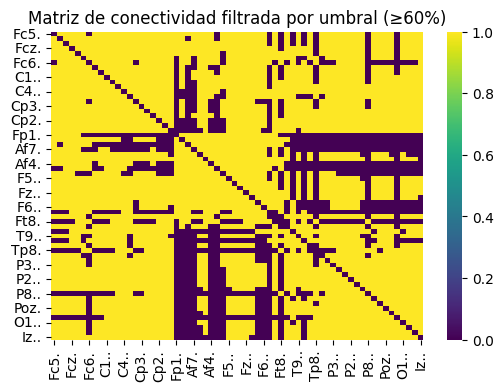

In [3]:
# Crear lista con los dataframes de ensayo3
ensayos_dfs = []
for llave in ensayo3_dict.keys():
    ensayos_dfs.append(ensayo3_dict[llave])
    # Parámetros para el filtrado
threshold = 0.62
porcentaje = 0.6

# Apilar matrices como un arreglo 3D
stack = np.stack([df.values for df in ensayos_dfs])

# Obtener matriz booleana de valores > threshold
above = stack > threshold

# Número de sujetos
N = len(ensayos_dfs)

# Contar cuántas veces cada celda supera el umbral
count_above = above.sum(axis=0)

# Mínimo requerido según el porcentaje
min_requerido = int(np.ceil((porcentaje/100) * N))

# Matriz final booleana según criterio
result_bool = count_above >= min_requerido

# Convertir a DataFrame
result_df = pd.DataFrame(
    result_bool,
    index=ensayos_dfs[0].index,
    columns=ensayos_dfs[0].columns
).astype(int)

# Graficar heatmap del resultado
plt.figure(figsize=(6, 4))
sns.heatmap(result_df, cmap="viridis")
plt.title("Matriz de conectividad filtrada por umbral (≥60%)")
plt.show()

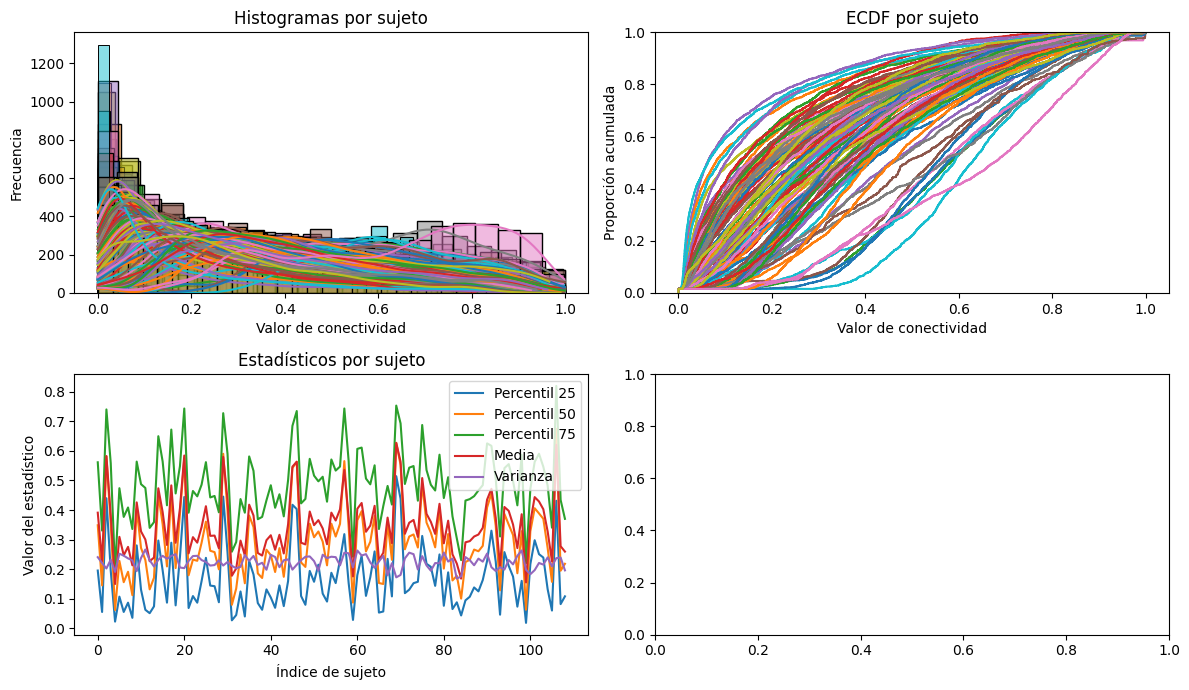

In [4]:
# Listas para estadísticos de cada sujeto
th25, th50, th75 = [], [], []
promedio, varianza = [], []

# Figura para histogramas, ECDF y estadísticos
fig, axes = plt.subplots(2, 2, figsize=(12, 7))

# Recorrer cada sujeto/matriz
for sujeto in ensayos_dfs:

    # Convertir matriz a vector
    data = sujeto.stack().values

    # Calcular estadísticos
    th25.append(np.percentile(data, 25))
    th50.append(np.percentile(data, 50))
    th75.append(np.percentile(data, 75))
    promedio.append(np.mean(data))
    varianza.append(np.std(data))

    # Histogramas y ECDF
    sns.histplot(data, ax=axes[0][0], kde=True)
    sns.ecdfplot(data, ax=axes[0][1])
    
## Títulos de Histograma y EDFC
axes[0][0].set_title("Histogramas por sujeto")
axes[0][1].set_title("ECDF por sujeto")

## Ejes del Histograma
axes[0][0].set_xlabel("Valor de conectividad")
axes[0][0].set_ylabel("Frecuencia")
## Ejes del EDFC
axes[0][1].set_xlabel("Valor de conectividad")
axes[0][1].set_ylabel("Proporción acumulada")

# Graficar los Estadísticos
axes[1][0].plot(th25, label="Percentil 25")
axes[1][0].plot(th50, label="Percentil 50")
axes[1][0].plot(th75, label="Percentil 75")
axes[1][0].plot(promedio, label="Media")
axes[1][0].plot(varianza, label="Varianza")
axes[1][0].legend()

## Títulos de Estadísticos
axes[1][0].set_title("Estadísticos por sujeto")

## Ejes de Estadísticos
axes[1][0].set_xlabel("Índice de sujeto")
axes[1][0].set_ylabel("Valor del estadístico")

plt.tight_layout()
plt.show()

# Clase 20 de noviembre, 2025

In [5]:
estadisticos_df = pd.DataFrame(columns = ['th25', 'th50', 'th75', 'promedio', 'mu_sigma'],
                              index = ['min', 'max', 'mediana', 'cosa_rara'])

columnas = [th25, th50, th75, promedio, mu_sigma]

from scipy import stats

min_, max_, mediana_, cosa_ = [], [], [], []
for c in columnas:
    d1, d2, d3, d4 = np.min(c), np.max(c), np.median(c), stats.median_abs_deviation(c)
    min_.append(d1)
    max_.append(d2)
    mediana_.append(d3)
    cosa_.append(d4)
estadisticos_df.loc['min'] = min_
estadisticos_df.loc['max'] = max_
estadisticos_df.loc['mediana'] = mediana_
estadisticos_df.loc['cosa_rara'] = cosa_
estadisticos_df

,th25,th50,th75,promedio,varianza
min,0.018413,0.06175,0.196867,0.149821,0.16782
max,0.514472,0.674805,0.819681,0.626848,0.266529
mediana,0.144574,0.273808,0.484181,0.3277,0.227821
cosa_rara,0.069559,0.080172,0.074567,0.063494,0.016573
